In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.preprocessing import StandardScaler

### Descriptive Summary of Fund Characteristic

In [2]:
df_ch = pd.read_excel(r'/Users/teslim/OneDrive/DissesationData/1-Fund_characteristics.xls')
df_ch.head()


,Fund_Id,NAV,fund_age,expenses_ratio,manager_tenure,fund_size
0,Fund_ 1,537.77,36.38,1.41,8.33,523.84
1,Fund_ 2,199.24,25.78,1.05,0.92,780.56
2,Fund_ 3,164.00,39.84,1.99,2.00,160.86
3,Fund_ 4,117.62,18.06,3.51,18.67,117.62
4,Fund_ 5,53.98,56.31,6.85,7.42,5315.00


In [5]:
df_ch.columns

Index(['Fund_Id', 'NAV', 'fund_age', 'expenses_ratio', 'manager_tenure',
       'fund_size'],
      dtype='object')

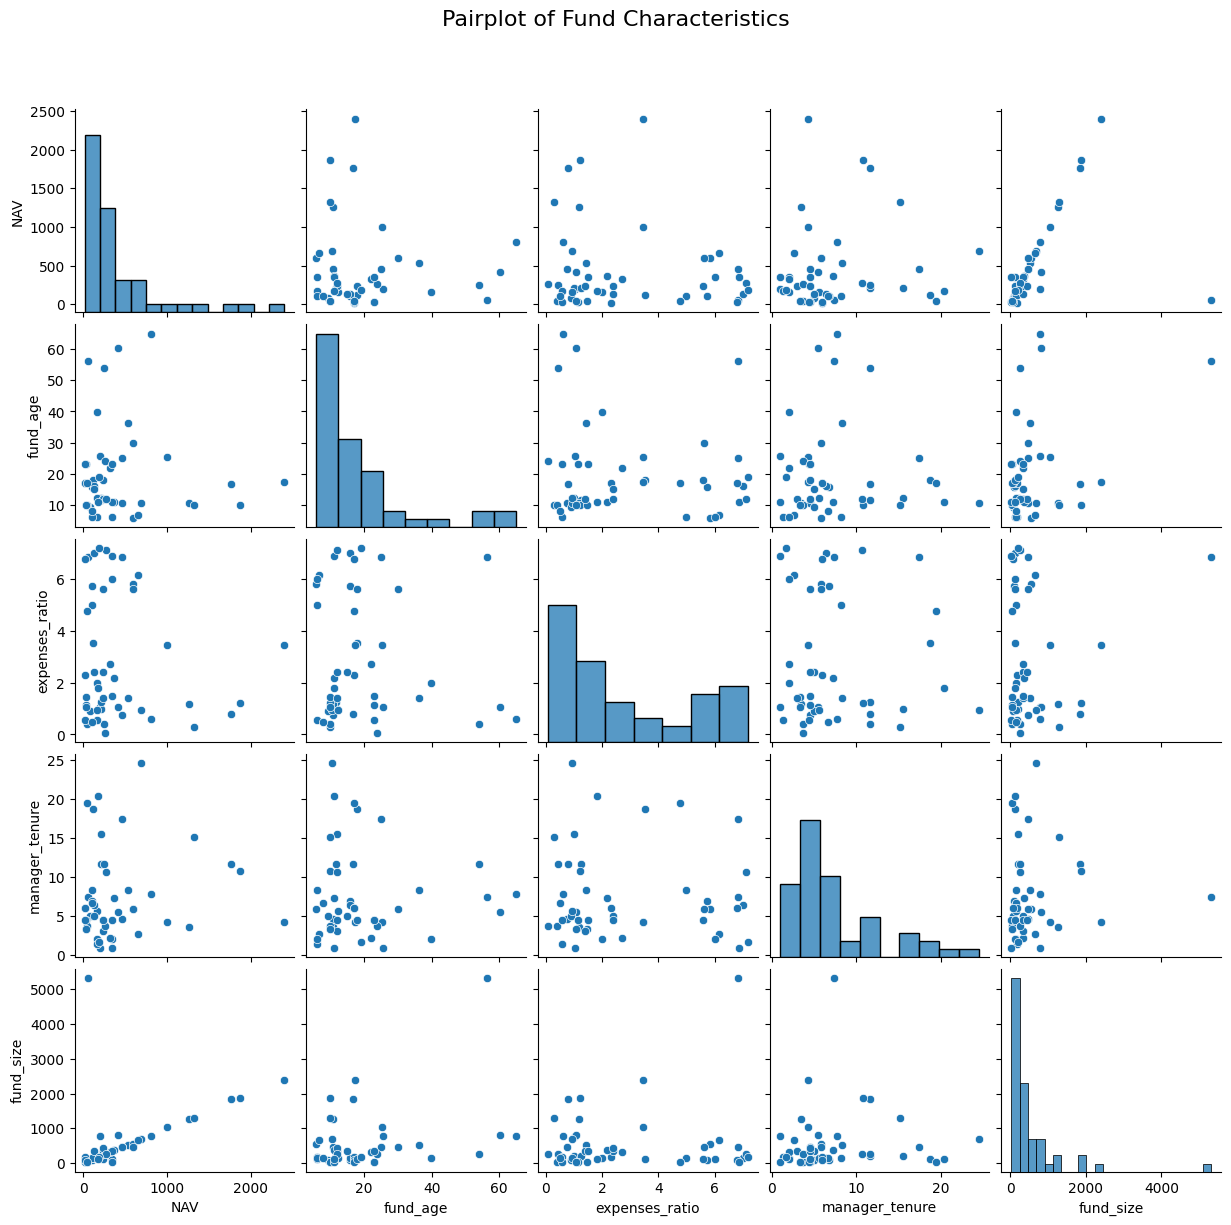

In [9]:
sns.pairplot(df_ch, vars=['NAV', 'fund_age', 'expenses_ratio','manager_tenure','fund_size'], kind='scatter')
plt.suptitle('Pairplot of Fund Characteristics', fontsize=16)
plt.subplots_adjust(top=0.9)

# Set x-axis label
plt.xlabel('Fund Characteristics')

# Set y-axis label
plt.ylabel('Fund Characteristics')

# Show the plot
plt.show()

In [3]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fund_Id                 50 non-null     object 
 1   Net Assest Value (NAV)  50 non-null     float64
 2   Fund Age (Years)        50 non-null     float64
 3   Expense Ratio           50 non-null     float64
 4    Manager Tenure (Yrs)   50 non-null     float64
 5    Fund Size(Mil)         50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [4]:
# Convert columns with string values to numeric values
df_ch = df_ch.apply(pd.to_numeric, errors='coerce')

# calculate the mean, std, min, max, and quantiles
desc = df_ch.describe()

# Calculate skewness and kurtosis
skewness = df_ch.apply(skew)
kurt = df_ch.apply(kurtosis)

# Combine the results
desc.loc['skewness'] = skewness
desc.loc['kurtosis'] = kurt

desc

,Fund_Id,Net Assest Value (NAV),Fund Age (Years),Expense Ratio,Manager Tenure (Yrs),Fund Size(Mil)
count,0.0,50.000000,50.000000,50.000000,50.000000,50.000000
mean,NaN,413.757600,19.097400,2.839600,7.211800,538.998200
std,NaN,508.309122,14.066293,2.402437,5.519680,859.236182
min,NaN,18.110000,5.880000,0.070000,0.920000,24.690000
25%,NaN,111.155000,10.577500,0.952500,3.670000,126.307500
50%,NaN,235.500000,15.375000,1.650000,5.540000,255.080000
75%,NaN,462.002500,23.000000,5.450000,8.310000,549.460000
max,NaN,2400.000000,65.000000,7.180000,24.580000,5315.000000
skewness,NaN,2.233864,1.884031,0.684125,1.394264,3.864417
kurtosis,NaN,4.785696,2.987887,-1.132820,1.279916,17.628563


/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/Teslim_data_science_study/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/Teslim_data_science_study/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/teslim/Library/CloudStorage/OneDrive-TeslimUthmanAdeyanju/Teslim_data_science_study/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


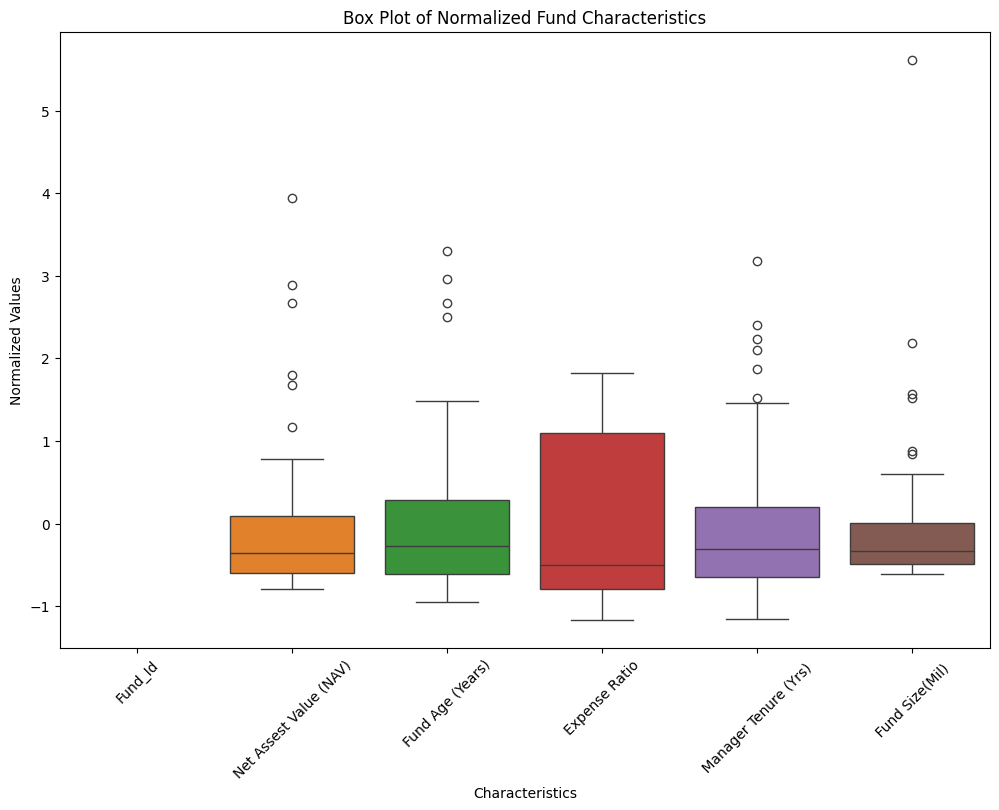

In [7]:
# Assuming df_ch is your DataFrame
scaler = StandardScaler()
df_ch_normalized = pd.DataFrame(scaler.fit_transform(df_ch), columns=df_ch.columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_ch_normalized)
plt.title('Box Plot of Normalized Fund Characteristics')
plt.xlabel('Characteristics')
plt.ylabel('Normalized Values')
plt.xticks(rotation=45)
plt.show()

### Mutual Returns and Risk

In [34]:
# Reading the data
import pandas as pd
import numpy as np

# Read the CSV file
df_returns = pd.read_excel(r'/Users/teslim/OneDrive/DissesationData/2-Returns_Dependent_Summary.xls')

# Display the first few rows of the data
df_returns.head()



,Fund_id,Returns_2019,Returns_2020,Returns_2021,Returns_2022,Returns_2023,Beta,RiskFreeRate,MarkertReturnRate,StandardDeviation
0,1,0.043766,-0.136608,0.075317,-0.082449,-0.188842,0.77,0.035,0.0543,0.0521
1,2,0.070619,-0.105941,0.124147,0.025232,0.002253,0.73,0.035,0.0543,0.0346
2,3,-0.031531,-0.110271,0.056090,-0.027476,-0.024083,1.00,0.035,0.0543,0.0445
3,4,0.063254,-0.092924,0.215339,0.025905,-0.008802,0.94,0.035,0.0543,0.0485
4,5,-0.013316,-0.239892,0.078313,-0.005687,0.007610,1.02,0.035,0.0543,0.0579


In [35]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fund_id              50 non-null     int64  
 1   Returns_2019         50 non-null     float64
 2   Returns_2020         50 non-null     float64
 3   Returns_2021         50 non-null     float64
 4   Returns_2022         50 non-null     float64
 5   Returns_2023         50 non-null     float64
 6    Beta                50 non-null     float64
 7   RiskFreeRate         50 non-null     float64
 8   MarkertReturnRate    50 non-null     float64
 9    StandardDeviation   50 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 4.0 KB


In [36]:
df_returns.columns

Index(['Fund_id', 'Returns_2019', 'Returns_2020', 'Returns_2021',
       'Returns_2022', 'Returns_2023', ' Beta ', 'RiskFreeRate ',
       'MarkertReturnRate', ' StandardDeviation '],
      dtype='object')

In [37]:
# Remove spaces before and after the letters in the column names and replace spaces with underscores
df_returns.columns = df_returns.columns.str.strip().str.replace(' ', '_')

# Convert the columns to numeric, coercing errors to NaN
df_returns = df_returns.apply(pd.to_numeric, errors='coerce')

df_returns.head()

,Fund_id,Returns_2019,Returns_2020,Returns_2021,Returns_2022,Returns_2023,Beta,RiskFreeRate,MarkertReturnRate,StandardDeviation
0,1,0.043766,-0.136608,0.075317,-0.082449,-0.188842,0.77,0.035,0.0543,0.0521
1,2,0.070619,-0.105941,0.124147,0.025232,0.002253,0.73,0.035,0.0543,0.0346
2,3,-0.031531,-0.110271,0.056090,-0.027476,-0.024083,1.00,0.035,0.0543,0.0445
3,4,0.063254,-0.092924,0.215339,0.025905,-0.008802,0.94,0.035,0.0543,0.0485
4,5,-0.013316,-0.239892,0.078313,-0.005687,0.007610,1.02,0.035,0.0543,0.0579


### Correlation matrix 

In [3]:
df =pd.read_excel(r'/Users/teslim/OneDrive/DissesationData/4-Correlation_data.xlsx')
df.head()


,Fund_id,Alpha,Sharpe_Ratio,Treynor_Ratio,NAV,Fund Age,Expense Ratio,Manager Tenure,Fund Size
0,1,-0.107624,-1.780486,-0.120472,537.77,36.38,1.41,8.33,523.84
1,2,-0.025827,-0.339249,-0.016079,199.24,25.78,1.05,0.92,780.56
2,3,-0.081754,-1.403464,-0.062454,164.00,39.84,1.99,2.00,160.86
3,4,-0.012588,0.114523,0.005909,117.62,18.06,3.51,18.67,117.62
4,5,-0.089281,-1.201978,-0.068230,53.98,56.31,6.85,7.42,5315.00


In [47]:
df.columns
df.columns = df.columns.str.strip().str.replace(' ', '_')

df
df.head()

,Fund_id,Alpha,Sharpe_Ratio,Treynor_Ratio,NAV,Fund_Age,Expense_Ratio,Manager_Tenure,Fund_Size
0,1,-0.107624,-1.780486,-0.120472,537.77,36.38,1.41,8.33,523.84
1,2,-0.025827,-0.339249,-0.016079,199.24,25.78,1.05,0.92,780.56
2,3,-0.081754,-1.403464,-0.062454,164.00,39.84,1.99,2.00,160.86
3,4,-0.012588,0.114523,0.005909,117.62,18.06,3.51,18.67,117.62
4,5,-0.089281,-1.201978,-0.068230,53.98,56.31,6.85,7.42,5315.00


In [50]:
correlation_matrix = df.corr()
correlation_matrix

,Fund_id,Alpha,Sharpe_Ratio,Treynor_Ratio,NAV,Fund_Age,Expense_Ratio,Manager_Tenure,Fund_Size
Fund_id,1.000000,0.414718,0.403617,0.457709,-0.277696,-0.257582,0.263496,-0.013784,-0.370333
Alpha,0.414718,1.000000,0.926152,0.975580,0.037417,-0.405174,0.109307,0.185959,-0.266979
Sharpe_Ratio,0.403617,0.926152,1.000000,0.923867,-0.005155,-0.252258,0.058055,0.096136,-0.207235
Treynor_Ratio,0.457709,0.975580,0.923867,1.000000,-0.008015,-0.404724,0.127576,0.146628,-0.269077
NAV,-0.277696,0.037417,-0.005155,-0.008015,1.000000,-0.016311,-0.115478,0.106878,0.493298
Fund_Age,-0.257582,-0.405174,-0.252258,-0.404724,-0.016311,1.000000,-0.067740,-0.013220,0.354765
Expense_Ratio,0.263496,0.109307,0.058055,0.127576,-0.115478,-0.067740,1.000000,-0.045806,0.093099
Manager_Tenure,-0.013784,0.185959,0.096136,0.146628,0.106878,-0.013220,-0.045806,1.000000,0.054243
Fund_Size,-0.370333,-0.266979,-0.207235,-0.269077,0.493298,0.354765,0.093099,0.054243,1.000000


ValueError: Length of values (6) does not match length of index (55)

### Dynamic Panel Data Model

In [5]:
import pandas as pd
# Load your dataset
data = pd.read_csv(r'/Users/teslim/OneDrive/DissesationData/Model_Data.csv', index_col=0)
data.head()

,Returns,NAV,fund_age,expenses_ratio,manager_tenure,fund_size
Fund_Id,,,,,,
Fund_ 1,-0.057763,537.77,36.38,1.41,8.33,523.84
Fund_ 2,0.023262,199.24,25.78,1.05,0.92,780.56
Fund_ 3,-0.027454,164.00,39.84,1.99,2.00,160.86
Fund_ 4,0.040554,117.62,18.06,3.51,18.67,117.62
Fund_ 5,-0.034595,53.98,56.31,6.85,7.42,5315.00


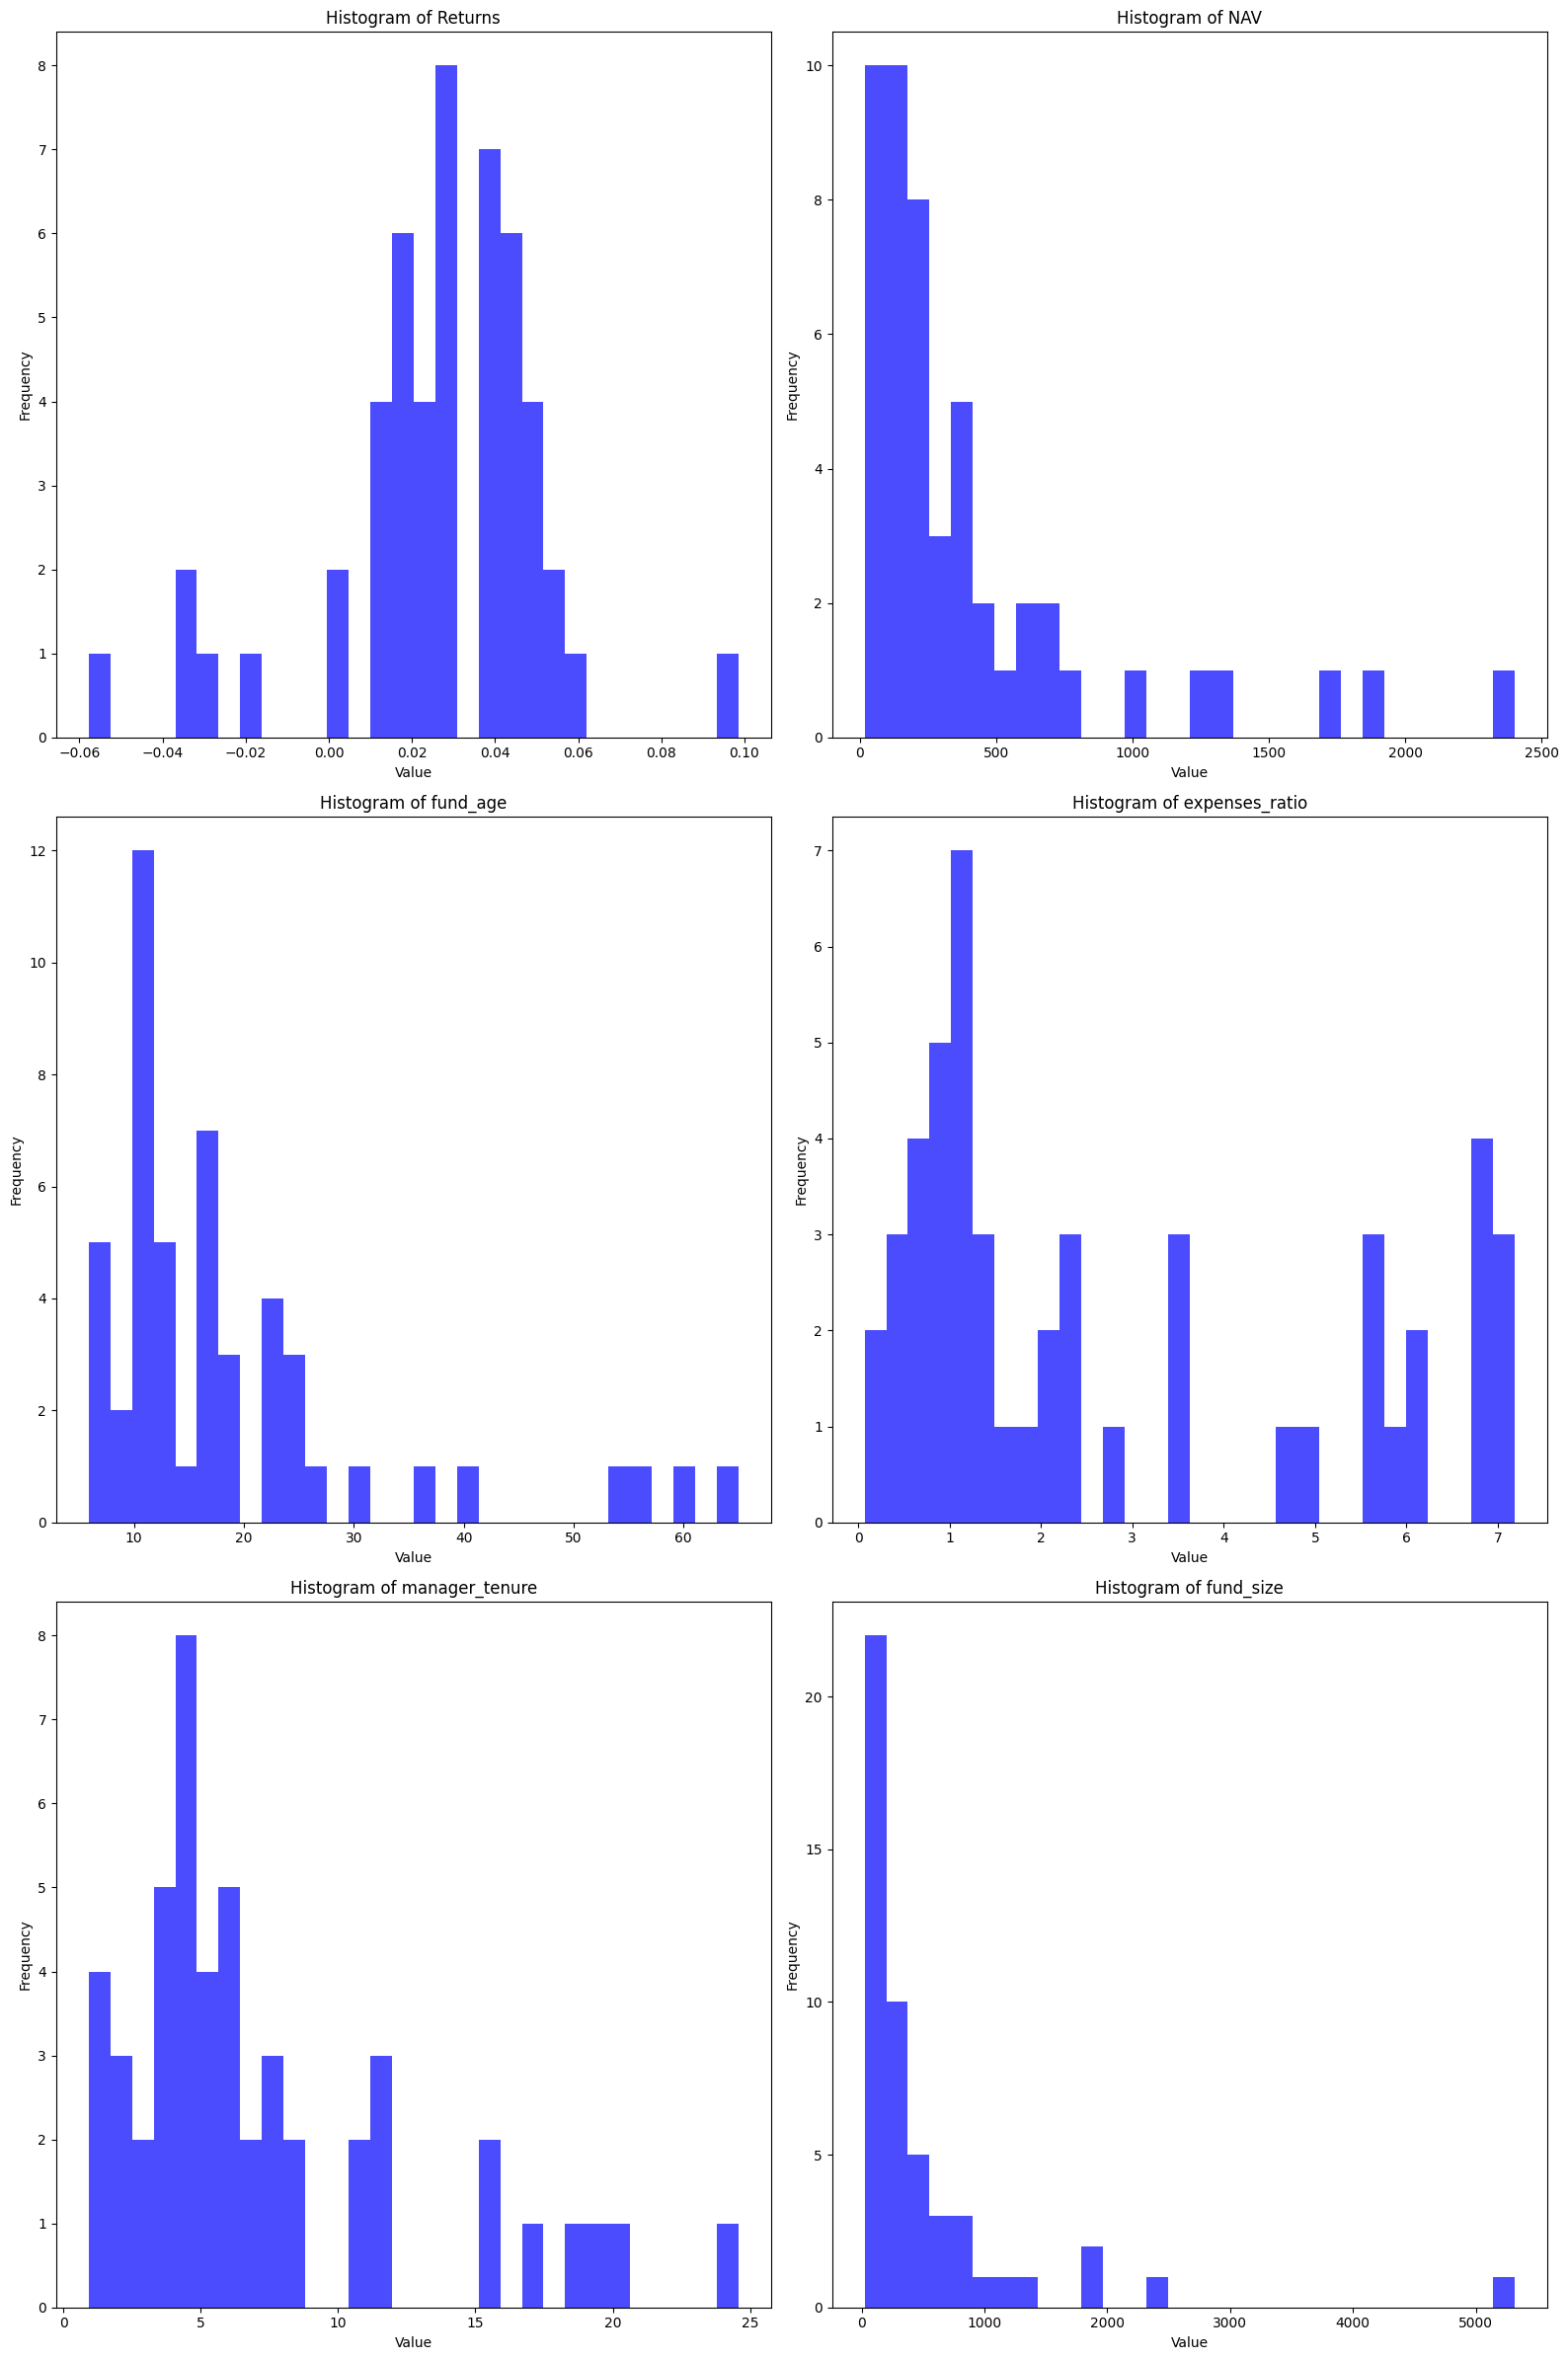

In [24]:
import matplotlib.pyplot as plt

# Get the column names of the data DataFrame
columns = data.columns

# Determine the number of rows and columns for the subplots
num_columns = 2  # Number of columns in the subplot grid
num_rows = (len(columns) + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(columns):
    ax = axes[i]
    
    # Plot the histogram for the current column
    ax.hist(data[column], bins=30, color='blue', alpha=0.7)
    
    # Set the x-axis label
    ax.set_xlabel('Value')
    
    # Set the y-axis label
    ax.set_ylabel('Frequency')
    
    # Set the title
    ax.set_title(f'Histogram of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

TypeError: Axes.scatter() missing 1 required positional argument: 'y'

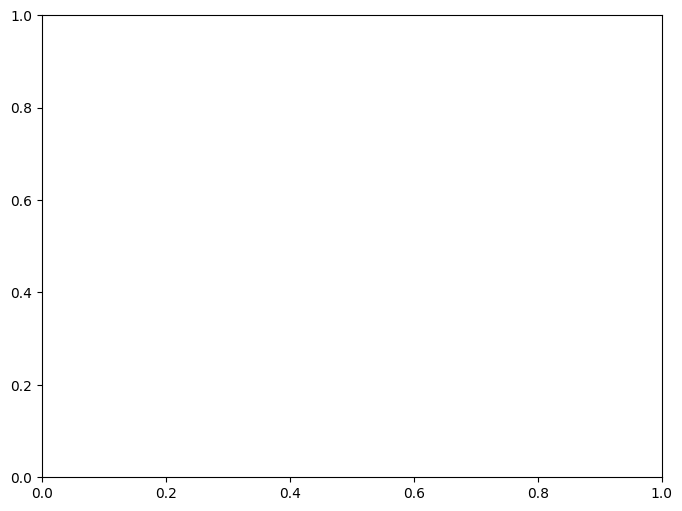

In [18]:
import matplotlib.pyplot as plt

# Get the column names of the data DataFrame
columns = data.columns

# Create a separate figure for each column
for column in columns:
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the histogram for the current column
    ax.hist(data[column], bins=10)
    
    # Set the x-axis label
    ax.set_xlabel('Value')
    
    # Set the y-axis label
    ax.set_ylabel('Frequency')
    
    # Set the title
    ax.set_title(f'Histogram of {column}')
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Get the column names of the data DataFrame
columns = data.columns

# Determine the number of rows and columns for the subplots
num_columns = 2  # Number of columns in the subplot grid
num_rows = (len(columns) + num_columns - 1) // num_columns  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 8 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(columns):
    ax = axes[i]
    
    # Plot the histogram for the current column
    ax.hist(data[column], bins=10)
    
    # Set the x-axis label
    ax.set_xlabel('Value')
    
    # Set the y-axis label
    ax.set_ylabel('Frequency')
    
    # Set the title
    ax.set_title(f'Histogram of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

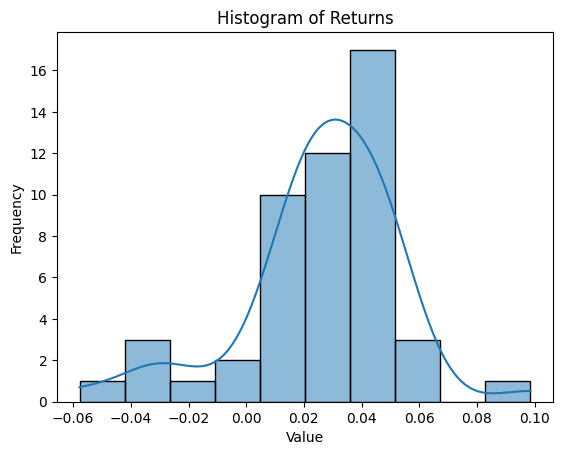

In [7]:
import seaborn as sns

sns.histplot(data["Returns"], bins=10, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram using seaborn.histplot')
plt.title('Histogram of Returns')
plt.show()

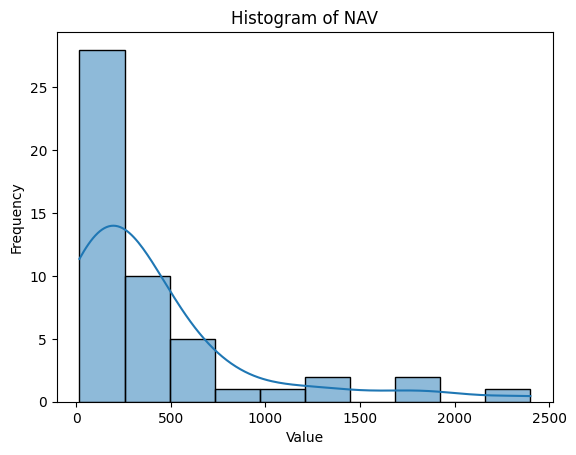

In [12]:
import seaborn as sns

sns.histplot(data["NAV"], bins=10, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram using seaborn.histplot')
plt.title('Histogram of NAV')
plt.show()

In [ ]:
import seaborn as sns

sns.histplot(data["Returns"], bins=10, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram using seaborn.histplot')
plt.title('Histogram of Returns')
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Fund_ 1 to Fund_ 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Returns         50 non-null     float64
 1   NAV             50 non-null     float64
 2   fund_age        50 non-null     float64
 3   expenses_ratio  50 non-null     float64
 4   manager_tenure  50 non-null     float64
 5   fund_size       50 non-null     float64
dtypes: float64(6)
memory usage: 4.8+ KB


In [33]:
import statsmodels.api as sm

# Define the dependent and independent variables
dependent_var = data['Returns']
independent_vars = data[['NAV', 'fund_age', 'expenses_ratio', 'manager_tenure', 'fund_size']]

# Add a constant for the intercept in the model
independent_vars = sm.add_constant(independent_vars)

# Fit the GLS model
gls_model = sm.GLS(dependent_var, independent_vars).fit()

# Print the summary of the GLS model
print(gls_model.summary())


                            GLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.253
Model:                            GLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.986
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0209
Time:                        14:51:06   Log-Likelihood:                 118.21
No. Observations:                  50   AIC:                            -224.4
Df Residuals:                      44   BIC:                            -212.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0278      0.010      2.

                            GLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.253
Model:                            GLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.986
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0209
Time:                        20:51:22   Log-Likelihood:                 118.21
No. Observations:                  50   AIC:                            -224.4
Df Residuals:                      44   BIC:                            -212.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0278      0.010      2.

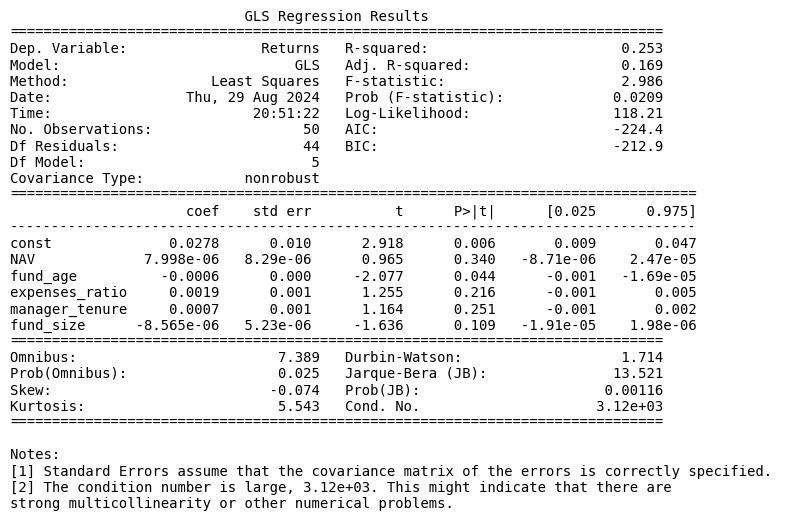

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent and independent variables
dependent_var = data['Returns']
independent_vars = data[['NAV', 'fund_age', 'expenses_ratio', 'manager_tenure', 'fund_size']]

# Add a constant for the intercept in the model
independent_vars = sm.add_constant(independent_vars)

# Fit the GLS model
gls_model = sm.GLS(dependent_var, independent_vars).fit()

# Print the summary of the GLS model
print(gls_model.summary())

# Convert the summary to a string
summary_str = gls_model.summary().as_text()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('off')

# Add the summary text to the plot
ax.text(0, 1, summary_str, fontfamily='monospace', fontsize=10, ha='left', va='top')

# Save the figure to the desktop
image_path = '/Users/teslim/Desktop/GLS_Model_Summary.png'
plt.savefig(image_path, bbox_inches='tight', dpi=300)

# Display the path to the saved image
print(image_path)

In [27]:
# 3. Breusch-Pagan Test for Heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(gls_model.resid, X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))



{'Lagrange multiplier statistic': 50.0, 'p-value': 0.6293857964360162, 'f-value': nan, 'f p-value': nan}


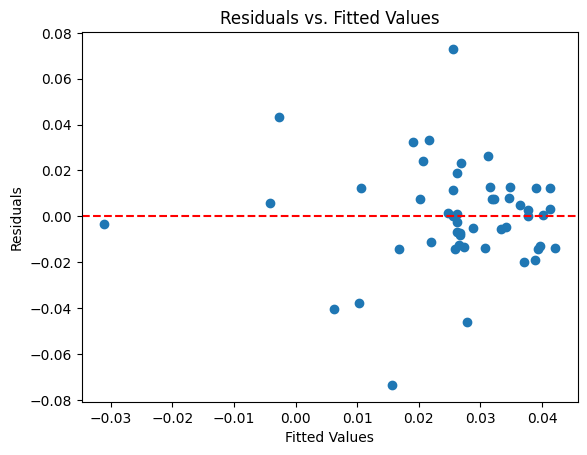

In [94]:
# 8. Residuals vs. Fitted Values Plot
import matplotlib.pyplot as plt

# Plot residuals vs fitted values
plt.scatter(gls_model.fittedvalues, gls_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


# Fixed-Effects and Random-Effects Models

In [41]:
# Fixed-Effects and Random-Effects Models
# Define the dependent and independent variables

from hmac import new

new_data = pd.read_csv(r'/Users/teslim/OneDrive/DissesationData/Model_Data.csv', index_col=0)

X_new = new_data[['NAV', 'fund_age', 'expenses_ratio', 'manager_tenure', 'fund_size']]
y_new = new_data['Returns']

# Add a constant to the model
X_new = sm.add_constant(X_new)

# Fit the Random Effects model (essentially the same as OLS in this context)
random_effects_model_new = sm.OLS(y_new, X_new).fit()
random_effects_summary_new = random_effects_model_new.summary()

random_effects_summary_new


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.986
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0209
Time:                        20:59:14   Log-Likelihood:                 118.21
No. Observations:                  50   AIC:                            -224.4
Df Residuals:                      44   BIC:                            -212.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0278      0.010      2.918      0.006       0.009       0.047
NAV             7.998e-06   8.29e-06      0.965      0.340   -8.71e-06    2.47e-05
fund_age          -0.0006      0.000     -2.077      0.044      -0.001   -1.69e-05
expenses_ratio     0.0019      0.001      1.255      0.216      -0.001       0.005
manager_tenure     0.0007      0.001      1.164      0.251      -0.001       0.002
fund_size      -8.565e-06   5.23e-06     -1.636      0.109   -1.91e-05    1.98e-06
==============================================================================
Omnibus:                        7.389   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               13.521
Skew:                          -0.074   Prob(JB):                      0.00116
Kurtosis:                       5.543   Cond. No.                     3.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Random_Effects_Model_Summary.png'

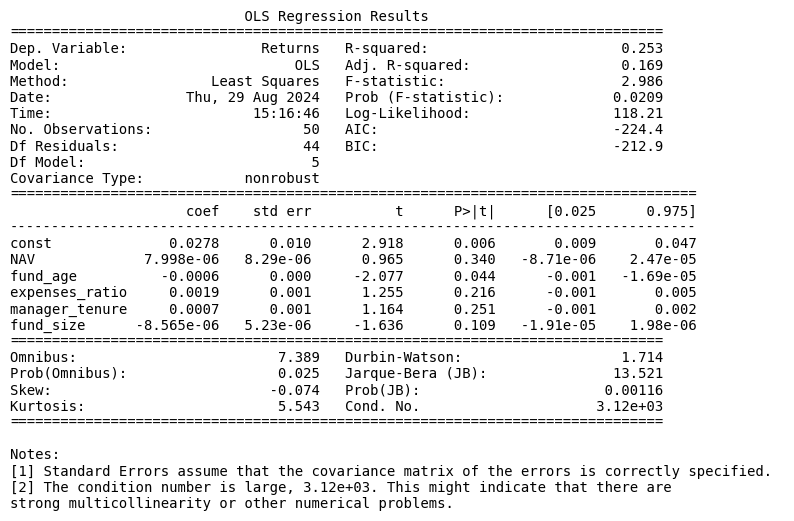

In [38]:

import matplotlib.pyplot as plt
from io import BytesIO

# Convert the summary to a string
summary_str = random_effects_summary_new.as_text()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('off')

# Add the summary text to the plot
ax.text(0, 1, summary_str, fontfamily='monospace', fontsize=10, ha='left', va='top')

# Save the figure
image_path = '/mnt/data/Random_Effects_Model_Summary.png'
plt.savefig(image_path, bbox_inches='tight', dpi=300)

# Display the path to the saved image
image_path

In [45]:
pooled_ols_model = sm.OLS(y_new, X_new).fit()
pooled_ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     2.986
Date:                Thu, 29 Aug 2024   Prob (F-statistic):             0.0209
Time:                        21:07:11   Log-Likelihood:                 118.21
No. Observations:                  50   AIC:                            -224.4
Df Residuals:                      44   BIC:                            -212.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0278      0.010      2.918      0.006       0.009       0.047
NAV             7.998e-06   8.29e-06      0.965      0.340   -8.71e-06    2.47e-05
fund_age          -0.0006      0.000     -2.077      0.044      -0.001   -1.69e-05
expenses_ratio     0.0019      0.001      1.255      0.216      -0.001       0.005
manager_tenure     0.0007      0.001      1.164      0.251      -0.001       0.002
fund_size      -8.565e-06   5.23e-06     -1.636      0.109   -1.91e-05    1.98e-06
==============================================================================
Omnibus:                        7.389   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               13.521
Skew:                          -0.074   Prob(JB):                      0.00116
Kurtosis:                       5.543   Cond. No.                     3.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(gls_model.resid, X)

bp_test_result = pd.Series(bp_test, index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
bp_test_result


Lagrange multiplier statistic    50.000000
p-value                           0.629386
f-value                                NaN
f p-value                              NaN
dtype: float64

In [1]:
from helper_functions import upload_txt_file, list_files_in_directory,

SyntaxError: trailing comma not allowed without surrounding parentheses (4062441795.py, line 1)